<a href="https://colab.research.google.com/github/yeekha89/Assignment-Submmissions/blob/main/Homework7_16_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Fashion-MNIST data
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape, y_train.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)


In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
# Import visualization libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)

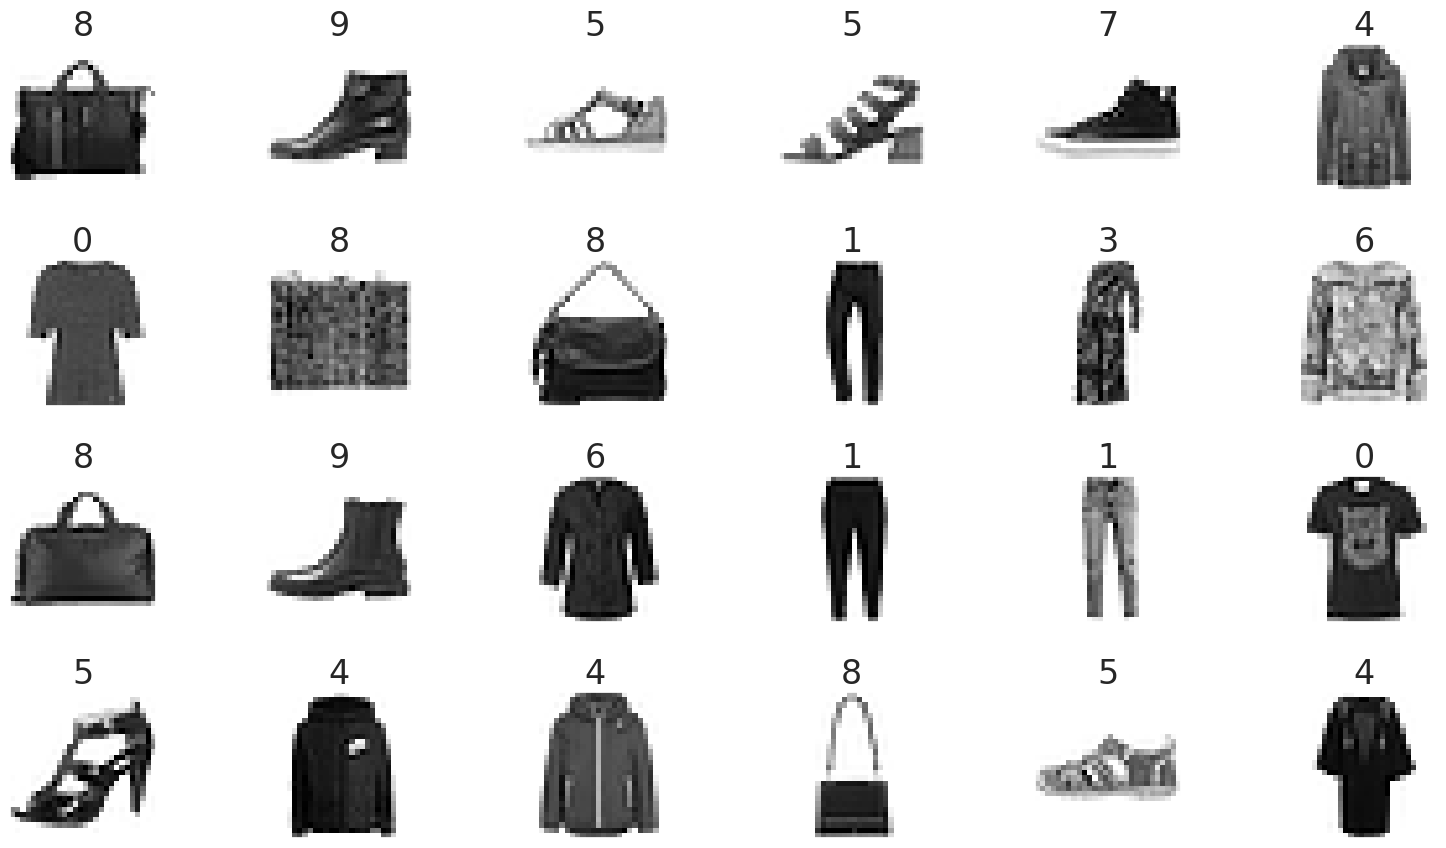

In [ ]:
# Plot image
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
  axes, image, target = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(target)
plt.tight_layout()

In [ ]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test = X_test.reshape((10000, 28, 28, 1))
X_test.shape

(10000, 28, 28, 1)

In [ ]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [ ]:
y_test = to_categorical(y_test)
y_test.shape

(10000, 10)

In [ ]:
from tensorflow.keras.models import Sequential
cnn = Sequential()

In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

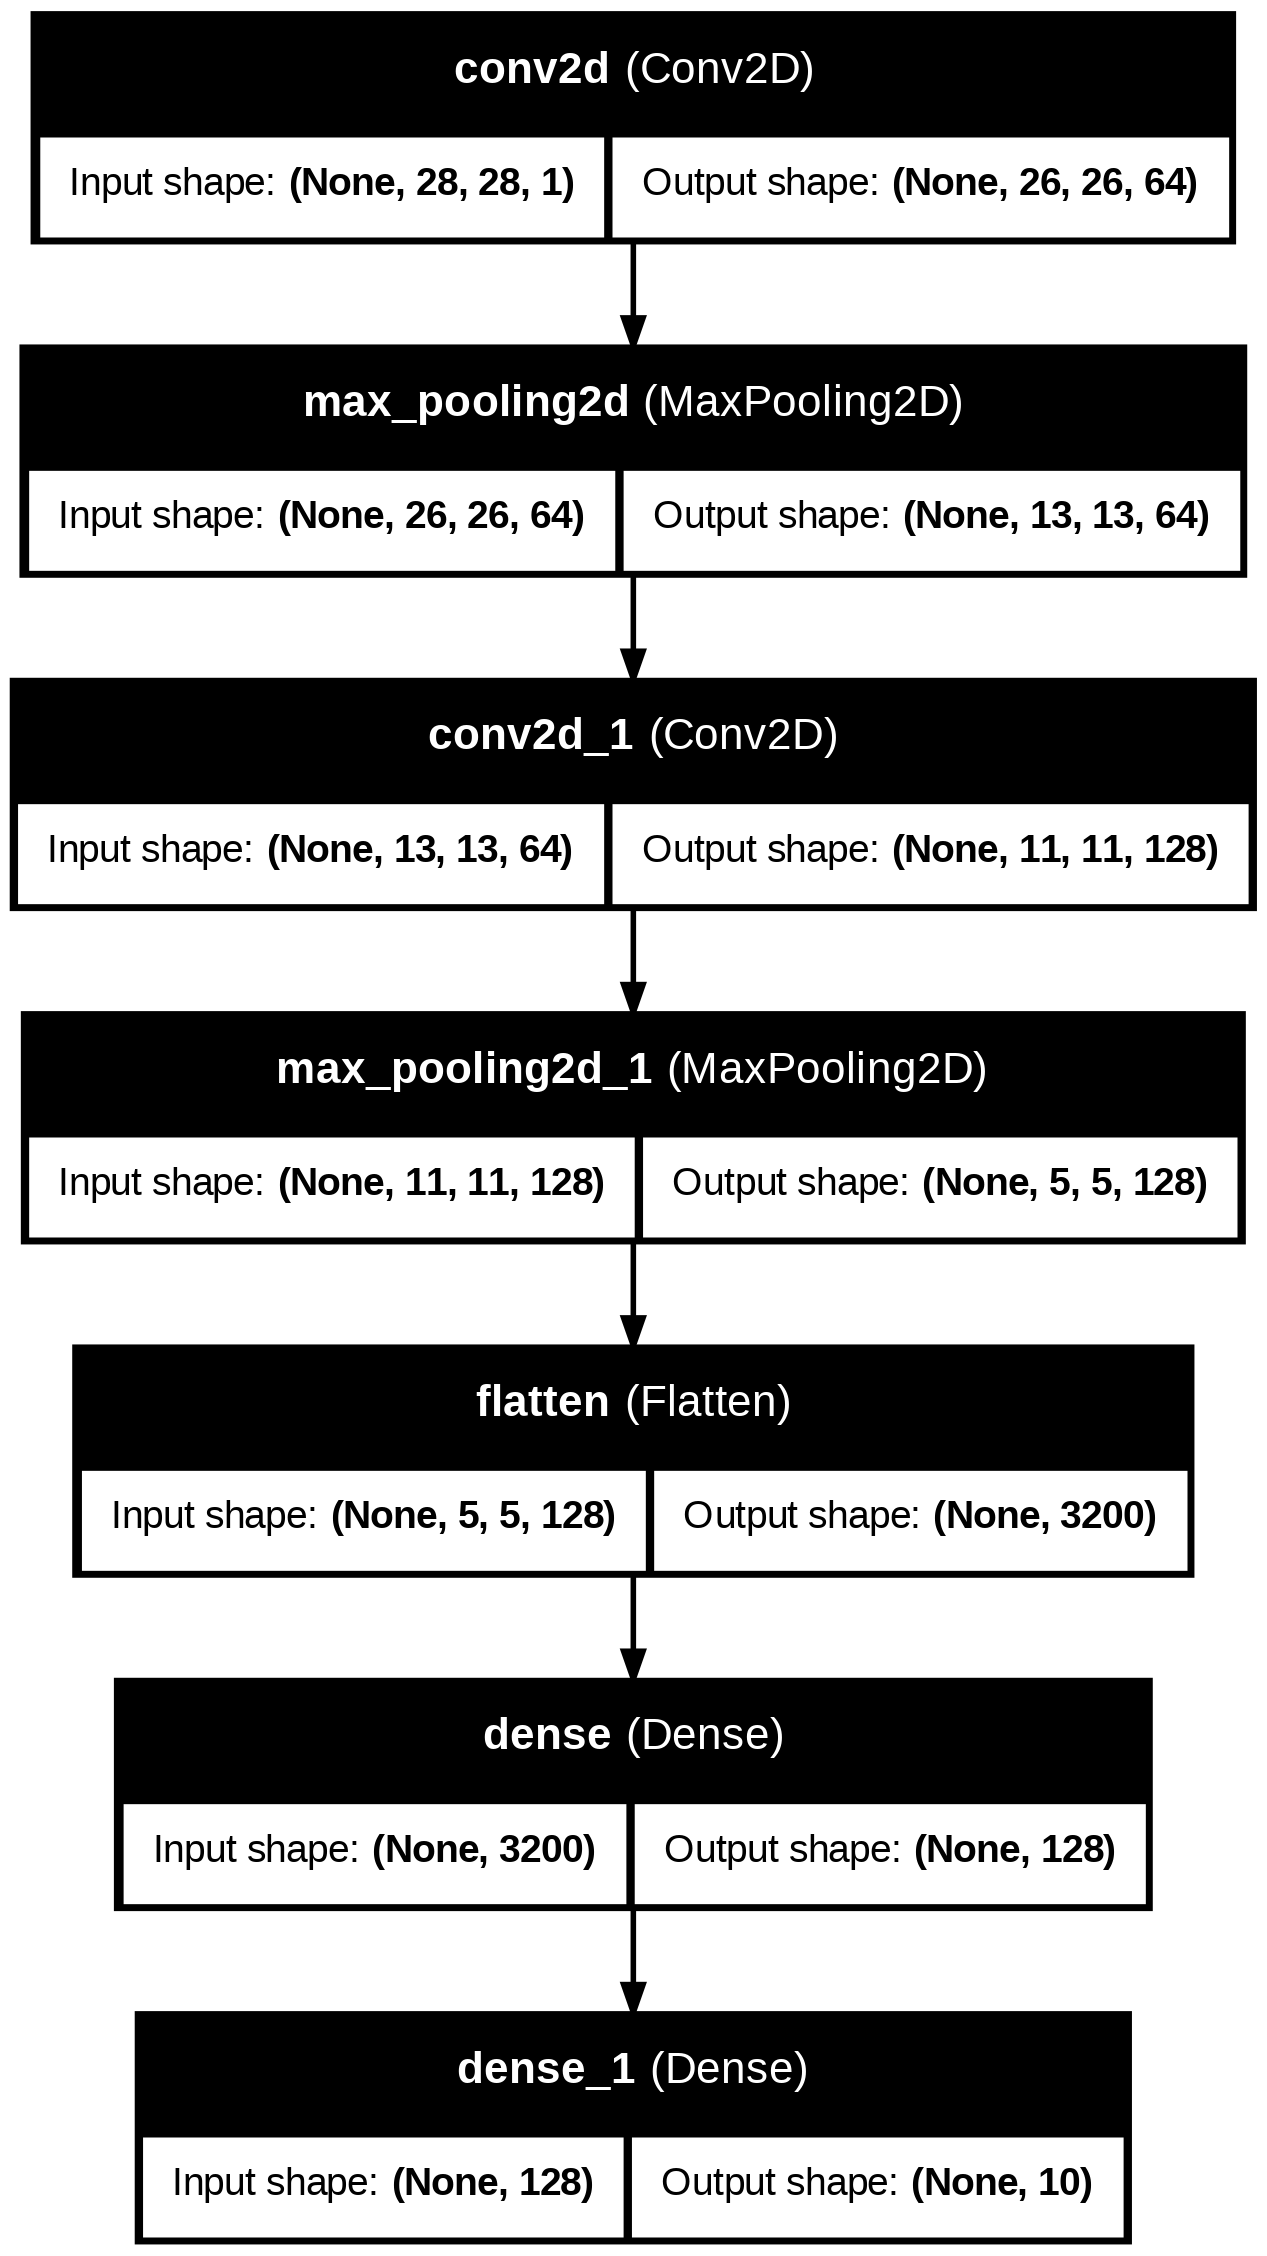

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='convnet.png')

In [ ]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7613 - loss: 0.6636 - val_accuracy: 0.8758 - val_loss: 0.3394
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8830 - loss: 0.3179 - val_accuracy: 0.8950 - val_loss: 0.2870
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9051 - loss: 0.2579 - val_accuracy: 0.8988 - val_loss: 0.2727
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9146 - loss: 0.2325 - val_accuracy: 0.9093 - val_loss: 0.2522
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9252 - loss: 0.2018 - val_accuracy: 0.9145 - val_loss: 0.2446


In [ ]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9069 - loss: 0.2662


In [ ]:
loss

0.2568322420120239

In [ ]:
accuracy

0.9097999930381775

In [ ]:
predictions = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
for index, probability in enumerate(predictions[0]):
  print(f'{index}: {probability:.10%}')

0: 0.0000434828%
1: 0.0000017639%
2: 0.0000219835%
3: 0.0000010980%
4: 0.0000003850%
5: 0.0120308163%
6: 0.0001829843%
7: 0.0226646283%
8: 0.0000033333%
9: 99.9650478363%


In [ ]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
  predicted, expected = np.argmax(p), np.argmax(e)

  if predicted != expected:
    incorrect_predictions.append((i, images[i], predicted, expected))

In [ ]:
len(incorrect_predictions)

902

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

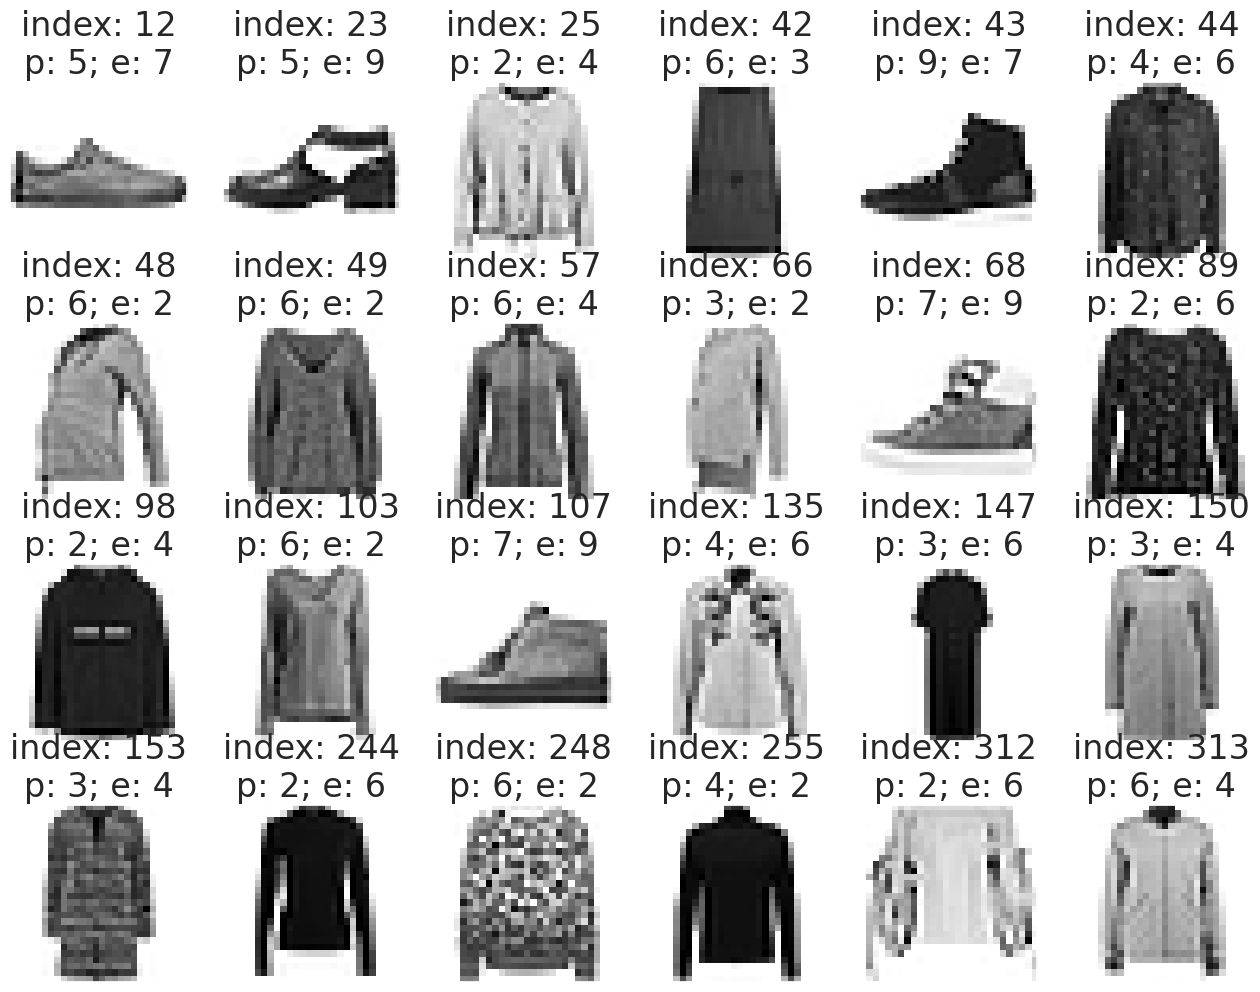

In [ ]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
  index, image, predicted, expected = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout

In [ ]:
def display_probabilites(prediction):
  for index, probability in enumerate(prediction):
    print(f'{index}: {probability:.10%}')

In [ ]:
# View probability for index 271
display_probabilites(predictions[271])

0: 0.4979252350%
1: 0.0112815091%
2: 0.1429022523%
3: 84.5670044422%
4: 0.5354267545%
5: 0.0000717015%
6: 14.2250746489%
7: 0.0000503959%
8: 0.0202299401%
9: 0.0000173344%


In [ ]:
# View probability for index 244
display_probabilites(predictions[244])

0: 0.0021465030%
1: 0.0000007637%
2: 99.0533113480%
3: 0.0252537517%
4: 0.7994343527%
5: 0.0000000002%
6: 0.1198369544%
7: 0.0000000026%
8: 0.0000077200%
9: 0.0000000095%


In [ ]:
cnn.save('mnist_cnn.h5')

In [ ]:
# Import libary to make print bold
from IPython.display import display, Markdown

print()
print()
display(Markdown(f"**Test Accuracy for the Fashion-MNIST dataset is: {accuracy * 100:.2f}%**"))
display(Markdown("**Test Accuracy for the MNIST dataset (according to the textbook example) is: {:.2f}%**".format(0.9917 * 100)))
print()
display(Markdown('**CNN generally performs better on MNIST than Fashion-MNIST as it achieves very high accuracy, almost a perfect score. This makes sense since Fashion-MNIST is more complex, working with clothing images in comparison to digits.**'))


**Test Accuracy for the Fashion-MNIST dataset is: 90.98%**

**Test Accuracy for the MNIST dataset (according to the textbook example) is: 99.17%**

**CNN generally performs better on MNIST than Fashion-MNIST as it achieves very high accuracy, almost a perfect score. This makes sense since Fashion-MNIST is more complex, working with clothing images in comparison to digits.**

In [71]:
import numpy as np
import time

# CNN model Function to run multiple datasets
def create_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # for integer labels
                  metrics=['accuracy'])
    return model

In [72]:
# Preparing function for datasets
def prepare_data(dataset):
    (X_train, y_train), (X_test, y_test) = dataset.load_data()

    # Normalizing image data
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    # Reshaping image data
    X_train = X_train.reshape((60000, 28, 28, 1))
    X_test = X_test.reshape((10000, 28, 28, 1))

    # Converting one-hot coding to integers
    if len(y_train.shape) == 2 and y_train.shape[1] == 10:
        y_train = np.argmax(y_train, axis=1)
        y_test = np.argmax(y_test, axis=1)

    return X_train, y_train, X_test, y_test

In [76]:
# Load and prepare MNIST
X_train, y_train, X_test, y_test = prepare_data(tf.keras.datasets.mnist)

# Training time on MNIST model
mnist_model = create_cnn()
start_time = time.time()
mnist_model.fit(X_train, y_train, epochs=8, batch_size=64, validation_split=0.1, verbose=2)
mnist_time = time.time() - start_time

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/8
844/844 - 7s - 9ms/step - accuracy: 0.9502 - loss: 0.1668 - val_accuracy: 0.9845 - val_loss: 0.0533
Epoch 2/8
844/844 - 7s - 9ms/step - accuracy: 0.9851 - loss: 0.0487 - val_accuracy: 0.9892 - val_loss: 0.0385
Epoch 3/8
844/844 - 3s - 3ms/step - accuracy: 0.9896 - loss: 0.0330 - val_accuracy: 0.9813 - val_loss: 0.0658
Epoch 4/8
844/844 - 3s - 3ms/step - accuracy: 0.9921 - loss: 0.0247 - val_accuracy: 0.9907 - val_loss: 0.0313
Epoch 5/8
844/844 - 3s - 3ms/step - accuracy: 0.9943 - loss: 0.0184 - val_accuracy: 0.9913 - val_loss: 0.0299
Epoch 6/8
844/844 - 3s - 4ms/step - accuracy: 0.9951 - loss: 0.0152 - val_accuracy: 0.9923 - val_loss: 0.0260
Epoch 7/8
844/844 - 3s - 3ms/step - accuracy: 0.9965 - loss: 0.0113 - val_accuracy: 0.9908 - val_loss: 0.0371
Epoch 8/8
844/844 - 2s - 3ms/step - accuracy: 0.9965 - loss: 0.0100 - val_accuracy: 0.9930 - val_loss: 0.0315


In [77]:
# Load Fashion-MNIST data
X_train_f, y_train_f, X_test_f, y_test_f = prepare_data(tf.keras.datasets.fashion_mnist)

# Training time on Fashion-MNIST model
model_fashion = create_cnn()
start_time = time.time()
model_fashion.fit(X_train_f, y_train_f, epochs=8, batch_size=64, validation_split=0.1, verbose=2)
fashion_time = time.time() - start_time

Epoch 1/8
844/844 - 7s - 8ms/step - accuracy: 0.8243 - loss: 0.4933 - val_accuracy: 0.8675 - val_loss: 0.3632
Epoch 2/8
844/844 - 3s - 3ms/step - accuracy: 0.8813 - loss: 0.3251 - val_accuracy: 0.8907 - val_loss: 0.2980
Epoch 3/8
844/844 - 2s - 3ms/step - accuracy: 0.8986 - loss: 0.2795 - val_accuracy: 0.8967 - val_loss: 0.2787
Epoch 4/8
844/844 - 2s - 3ms/step - accuracy: 0.9085 - loss: 0.2482 - val_accuracy: 0.9053 - val_loss: 0.2575
Epoch 5/8
844/844 - 3s - 4ms/step - accuracy: 0.9181 - loss: 0.2230 - val_accuracy: 0.9075 - val_loss: 0.2461
Epoch 6/8
844/844 - 3s - 3ms/step - accuracy: 0.9254 - loss: 0.2016 - val_accuracy: 0.9127 - val_loss: 0.2449
Epoch 7/8
844/844 - 3s - 3ms/step - accuracy: 0.9331 - loss: 0.1787 - val_accuracy: 0.9103 - val_loss: 0.2524
Epoch 8/8
844/844 - 3s - 3ms/step - accuracy: 0.9389 - loss: 0.1644 - val_accuracy: 0.9090 - val_loss: 0.2544


In [78]:
# Print training times
display(Markdown(f"**The training time on MNIST is: {mnist_time:.2f} seconds**"))
display(Markdown(f"**The training time on Fashion-MNIST is: {fashion_time:.2f} seconds**"))

**The training time on MNIST is: 30.69 seconds**

**The training time on Fashion-MNIST is: 25.63 seconds**